# Degree Preserving Edge Swaps

In [1]:
from graspologic.simulations import er_np
from graspologic.datasets import load_drosophila_right
from graspologic.models import EdgeSwapper
from graspologic.plot import heatmap
from graspologic.utils import binarize, symmetrize
import matplotlib.pyplot as plt
import networkx as nx
from scipy.sparse import csr_matrix

`EdgeSwap` is a class that performs degree preserving edge swaps on graphs with fixed degree sequences. The distributions of graphs with a fixed degree sequence are known as configuration models, and these have extensive application for analyzing network datasets. The current implementation works on simple graphs (unewighted, no loops) that are of type `np.ndarray` or `csr_matrix`.

To begin, let us simulate an Erdos Renyi graph and a csr matrix, and visualize them

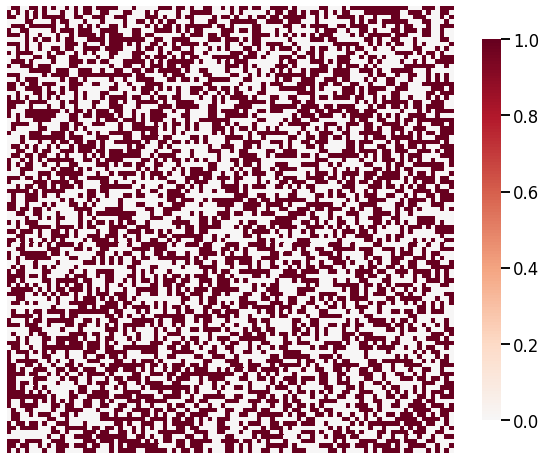

In [2]:
n = 100
p = 0.5

#er_graph is type np.ndarray
er_graph = er_np(n, p)
heatmap(er_graph)

#save as nx graph to compare degrees after swap
nx_er_prior = nx.from_numpy_array(er_graph)

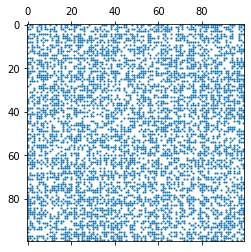

In [3]:
#csr graph has same parameters as our er_graph
csr_graph = csr_matrix(er_graph)
plt.spy(csr_graph, markersize=1)

#save as nx graph to compare degrees after swap
nx_csr_prior = nx.from_scipy_sparse_matrix(csr_graph)

Now let us run dpes on these graphs and ensure that they have the same degree sequence

In [4]:
swapper_er = EdgeSwapper(er_graph)
swapped_er, _ = swapper_er.swap_edges(n_swaps=1000)
nx_er_after = nx.from_numpy_array(swapped_er)
print(list(nx_er_prior.degree()) == list(nx_er_after.degree()))

True


In [5]:
swapper_scipy = EdgeSwapper(csr_graph)
swapped_scipy, _ = swapper_scipy.swap_edges(n_swaps=1000)
swapped_scipy = swapped_scipy.toarray()
nx_csr_after = nx.from_numpy_array(swapped_scipy)
print(list(nx_csr_prior.degree()) == list(nx_csr_after.degree()))

True


In this section, we run dpes on real data: in particular, the _Drosophila melanogaster_ larva right mushroom body connectome from [Eichler et al. 2017](https://www.ncbi.nlm.nih.gov/pubmed/28796202), and show that the degree will be preserved.

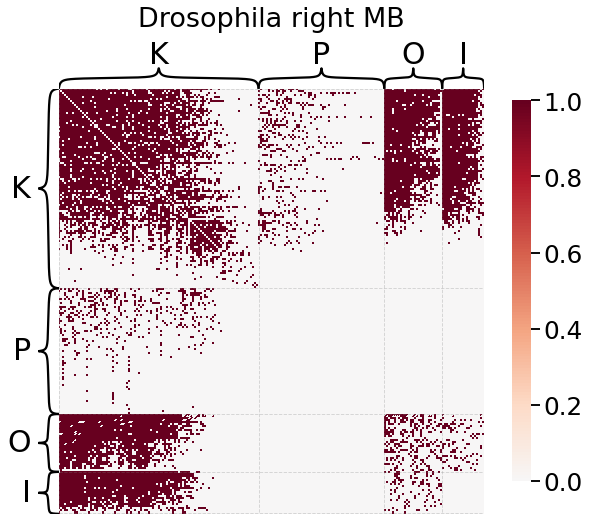

In [6]:
#load the data
adj, labels = load_drosophila_right(return_labels=True)
adj = symmetrize(adj)
adj = binarize(adj)
_ = heatmap(adj,
        inner_hier_labels=labels,
        title='Drosophila right MB',
        font_scale=1.5,
        sort_nodes=True)
nx_dros_prior = nx.from_numpy_array(adj)

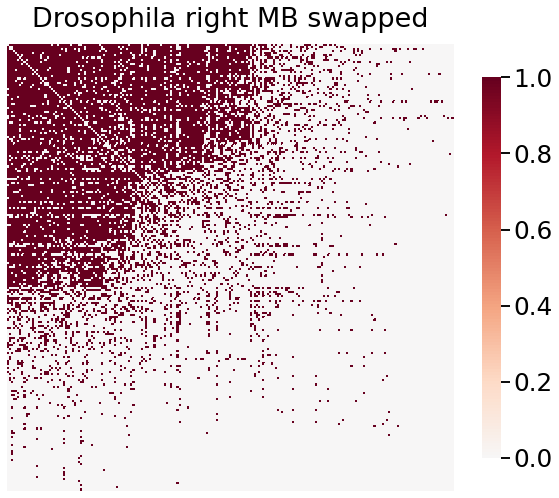

In [7]:
swapper_dros = EdgeSwapper(adj)
swapped_dros, _ = swapper_dros.swap_edges(n_swaps=1000)
_ = heatmap(swapped_dros,
        title='Drosophila right MB swapped',
        font_scale=1.5,
        sort_nodes=True)

In [8]:
nx_er_after = nx.from_numpy_array(swapped_er)
print(list(nx_er_prior.degree()) == list(nx_er_after.degree()))

True
